Aaron Morgan

CONCLUSIONS: Within this data and each table created, we can conclude many different things. The drug Capomulin had the greatest effect concerning the tumor volume size decrease than the three other drugs that were also tested. Capomulin also had the least amount of metastatic sites growth and the greatest survival rate over the 45 day trial. What I would like to be able to analyze and chart would be to see if any of the drugs tested on the mice actually increased the growth of tumors more quickly than a baseline tumor. For instance, Ketapril tumor volume change over the 45 day trial had a higher change than the placebo which may mean that it actually helped the tumor grow instead of slowly killing it off.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged_df = clinical_data.merge(mouse_data, on = 'Mouse ID')

# Create new DataFrame with only the drugs we need to examine to make analysis easier
updated_df = merged_df[(merged_df["Drug"] == 'Capomulin')|
                       (merged_df["Drug"] == 'Infubinol')|
                       (merged_df["Drug"] == 'Ketapril')|
                       (merged_df["Drug"] == 'Placebo')]

# Display the data table for preview
updated_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_volume = pd.DataFrame(updated_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])
mean_volume

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
Ketapril  0                   45.000000
          5                   47.389175
          10                  49.582269
          15                  52.399974
          20                  54.920935
          25                  57.678982
          30                  60.994507
          35                  63.371686
          40                  66.068580
          45                  70.662958
Placebo   0                   45.000000
          5                   47.125589
          10                  49.423329
          15                  51.359742
          20                  54.364417
          25                  57.482574
          30                  59.809063
          35                  62.420615
          40                  65.052675
          45                  68.084082

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_volume_stderr = pd.DataFrame(updated_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])
mean_volume_stderr

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427
Ketapril  0                    0.000000
          5                    0.264819
          10                   0.357421
          15                   0.580268
          20                   0.726484
          25                   0.755413
          30                   0.934121
          35                   1.127867
          40                   1.158449
          45                   1.453186
Placebo   0                    0.000000
          5                    0.218091
          10                   0.402064
          15                   0.614461
          20                   0.839609
          25                   1.034872
          30                   1.218231
          35                   1.287481
          40                   1.370634
          45                   1.351726

In [4]:
# Minor Data Munging to Re-Format the mean Data Frame
mean_volume = mean_volume.unstack(level = 0)
mean_volume.columns = mean_volume.columns.get_level_values(1)
mean_volume

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [5]:
# Minor Data Munging to Re-Format the standard deviation Data Frame
mean_volume_stderr = mean_volume_stderr.unstack(level = 0)
mean_volume_stderr.columns = mean_volume_stderr.columns.get_level_values(1)
mean_volume_stderr

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


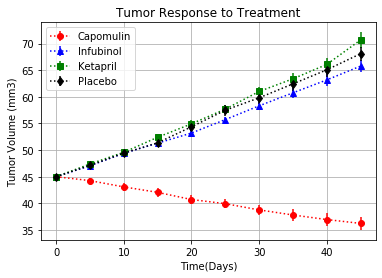

In [6]:
# Generate the Plot (with Error Bars)
x_axis = mean_volume.index

markers = ["o", "^", "s", "d"]
colors = ["red", "blue", "green", "black"]
count = 0

for drug in mean_volume.columns:
    plt.errorbar(x_axis, mean_volume[drug], mean_volume_stderr[drug], 
                 marker = markers[count],
                 color = colors[count],
                 label=drug,
                 linestyle = ':')
    count += 1


plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")
plt.grid(True)

# Save the Figure
plt.savefig("data/TumorResponse.png")

plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic = pd.DataFrame(updated_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])
mean_metastatic

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
Ketapril  0                  0.000000
          5                  0.304348
          10                 0.590909
          15                 0.842105
          20                 1.210526
          25                 1.631579
          30                 2.055556
          35                 2.294118
          40                 2.733333
          45                 3.363636
Placebo   0                  0.000000
          5                  0.375000
          10                 0.833333
          15                 1.250000
          20                 1.526316
          25                 1.941176
          30                 2.266667
          35                 2.642857
          40                 3.166667
          45                 3.272727

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_metastatic_stderr = pd.DataFrame(updated_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"])
mean_metastatic_stderr

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
Ketapril  0                  0.000000
          5                  0.098100
          10                 0.142018
          15                 0.191381
          20                 0.236680
          25                 0.288275
          30                 0.347467
          35                 0.361418
          40                 0.315725
          45                 0.278722
Placebo   0                  0.000000
          5                  0.100947
          10                 0.115261
          15                 0.190221
          20                 0.234064
          25                 0.263888
          30                 0.300264
          35                 0.341412
          40                 0.297294
          45                 0.304240

In [9]:
# Minor Data Munging to Re-Format the mean Data Frame
mean_metastatic = mean_metastatic.unstack(level = 0)
mean_metastatic.columns = mean_metastatic.columns.get_level_values(level = 1)
mean_metastatic

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [10]:
# Minor Data Munging to Re-Format the standard error Data Frame
mean_metastatic_stderr = mean_metastatic_stderr.unstack(level = 0)
mean_metastatic_stderr.columns = mean_metastatic_stderr.columns.get_level_values(level = 1)
mean_metastatic_stderr

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


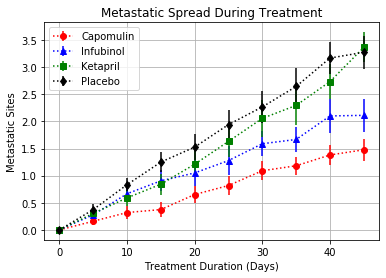

In [11]:
# Generate the Plot (with Error Bars)
x_axis = mean_metastatic.index

markers = ["o", "^", "s", "d"]
colors = ["red", "blue", "green", "black"]
count = 0

for drug in mean_metastatic.columns:
    plt.errorbar(x_axis, mean_metastatic[drug], mean_metastatic_stderr[drug], 
                 marker = markers[count],
                 color = colors[count],
                 label=drug,
                 linestyle = ':')
    count += 1


plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")
plt.grid(True)

# Save the Figure
plt.savefig("data/MetastaticSpread.png")

plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = pd.DataFrame(updated_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])
mouse_count

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
Ketapril  0                25
          5                23
          10               22
          15               19
          20               19
          25               19
          30               18
          35               17
          40               15
          45               11
Placebo   0                25
          5                24
          10               24
          15               20
          20               19
          25               17
          30               15
          35               14
          40               12
          45               11

In [13]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count = mouse_count.unstack(level = 0)
mouse_count

Mouse ID                           
Drug      Capomulin Infubinol Ketapril Placebo
Timepoint                                     
0                25        25       25      25
5                25        25       23      24
10               25        21       22      24
15               24        21       19      20
20               23        20       19      19
25               22        18       19      17
30               22        17       18      15
35               22        12       17      14
40               21        10       15      12
45               21         9       11      11

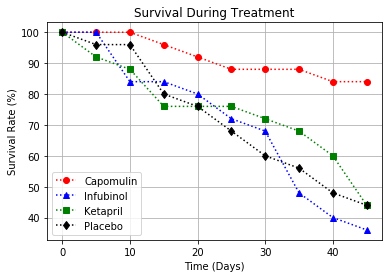

In [14]:
# Generate the Plot (with Error Bars)
x_axis = mouse_count.index

markers = ["o", "^", "s", "d"]
colors = ["red", "blue", "green", "black"]
count = 0

for drug in mouse_count:
    y_axis = mouse_count[drug]/mouse_count.loc[0,drug] * 100
    plt.plot(x_axis, y_axis, 
                 marker = markers[count],
                 color = colors[count],
                 label=drug[1],
                 linestyle = ':')
    count += 1


plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="best")
plt.grid(True)

# Save the Figure
plt.savefig("data/SurvivalDuringTreatment.png")

plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
drug_percent_change = (mean_volume.loc[45, :] - mean_volume.loc[0, :])/mean_volume.loc[0, :] * 100
drug_percent_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

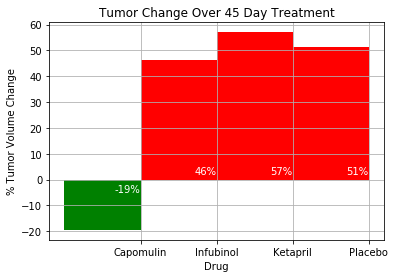

In [16]:
# Plotting the bar graph
xlabels = drug_percent_change.index
plt.xticks(np.arange(len(xlabels)), xlabels)
plt.grid(True)


plt.bar(np.arange(4) ,drug_percent_change,
        width=-1.0,
        align="edge",
        color = ["red" if drug_percent_change[drug] > 0 else "green" for drug in np.arange(len(xlabels))])


count = 0

for drug in drug_percent_change:
    if drug < 0:
        y_coor = -5
    else:
        y_coor = 2
    plt.text(count, y_coor, str(round(drug)) + "%", horizontalalignment = "right", color = "white")
    count +=1

    
    
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid(True)

# Save the Figure
plt.savefig("data/TumorChangeWithTreatment.png")


# Show the Figure
plt.show()